# **Proiect Predicție popularitate melodii - ML**

## **Încărcarea setului de date în notebook**

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('SpotifyFeatures.csv')
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


## **Prepararea datelor**

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


// Definim valorile unice 

In [14]:
unique_values = df['track_name'].unique()
print(unique_values)


["C'est beau de faire un Show" "Perdu d'avance (par Gad Elmaleh)"
 "Don't Let Me Be Lonely Tonight" ... 'P.O.P.' 'Burning Fire'
 "You Don't Have To Hurt No More"]


# Separarea coloanelor 

### Separăm coloanele in funcție de X și y (unde y este coloana popularity)

In [2]:
y = df['popularity']
y

0          0
1          1
2          3
3          0
4          4
          ..
232720    39
232721    38
232722    47
232723    44
232724    35
Name: popularity, Length: 232725, dtype: int64

In [3]:
X = df.drop('popularity', axis=1)
X

,genre,artist_name,track_name,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


## **Despărțirea datelor**

### Despărțim datele în date principale și date de test

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=90)
X_train


,genre,artist_name,track_name,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
86420,R&B,Tinashe,Feels Like Vegas,0DqKMbPXhUIXcgDOVmohiM,0.19400,0.653,241173,0.569,0.000046,B,0.0610,-7.024,Minor,0.0311,129.989,4/4,0.402
16232,Dance,Mariah Carey,Don't Forget About Us,2hQU8LNZFUcXLUwqeABX3K,0.04220,0.700,233867,0.529,0.000000,A#,0.1010,-6.816,Minor,0.0395,143.555,4/4,0.386
84727,R&B,JMSN,Inferno,5Qg1StPjfDnTY42zF7i02d,0.00821,0.766,264560,0.908,0.000026,C#,0.0705,-4.769,Major,0.1190,98.973,4/4,0.791
104707,Classical,Ludwig van Beethoven,"Diabelli Variations, Op. 120: Var. 4, Un poco ...",1dRU8xP5aVDjjJiGylx96V,0.98500,0.224,70360,0.171,0.908000,C,0.2240,-22.148,Major,0.0395,83.924,1/4,0.254
149317,Pop,Kanye West,Lost In The World,2Im64pIz6m0EJKdUe6eZ8r,0.11500,0.609,256587,0.746,0.008700,F,0.4270,-5.249,Minor,0.1840,117.072,4/4,0.277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75075,Children's Music,The Countdown Kids,My Favorite Things,0cGLDyvfm2pqALUCTLb6sN,0.73300,0.619,95253,0.357,0.000000,E,0.1670,-10.919,Minor,0.0373,159.667,3/4,0.657
203423,Soundtrack,Paul Leonard-Morgan,Test Track - Instrumental,2z9ncqhA3xpVmS3E8aPV1O,0.17500,0.561,311427,0.582,0.493000,G,0.1500,-9.740,Major,0.0315,130.020,4/4,0.501
136818,Reggae,Israel Vibration,Man Up (feat. Droop Lion),0uMUwyKnUCQdp7et7lQP8z,0.15600,0.818,242227,0.463,0.000000,B,0.1680,-6.686,Major,0.2290,87.821,4/4,0.615
166557,Rock,Spin Doctors,Two Princes,4ePP9So5xRzspjLFVVbj90,0.00162,0.543,256733,0.912,0.000002,G,0.0565,-10.710,Major,0.0601,103.731,4/4,0.836


In [5]:
X_test

,genre,artist_name,track_name,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
96379,Indie,Radiohead,Jigsaw Falling Into Place,15ea10YpJIl3mJq75yzqsD,0.10500,0.461,248893,0.833,0.004190,B,0.0741,-6.082,Minor,0.0481,165.635,4/4,0.808
101120,Children’s Music,Joe Goddard,Electric Lines,2WLaRlaBmBHL6dqaovdO0m,0.20200,0.735,357401,0.437,0.065500,G#,0.0872,-10.722,Major,0.0304,126.025,4/4,0.196
8904,Country,Seckond Chaynce,I Just Want a Truck,0QVuyQAD2jQoLKU2UubZnF,0.05670,0.605,183144,0.849,0.000000,D,0.3950,-3.766,Major,0.0502,90.036,4/4,0.851
113163,Pop,Future,Oxy (feat. Lil Wayne),0nWMTq3fBceV1uZlhFn6of,0.00779,0.811,180080,0.526,0.064200,G#,0.1300,-7.003,Major,0.1610,149.954,4/4,0.248
194431,Movie,Oliver Wallace,Sunday/The Rat/Morning Paper,5IvIwSVG2KdRDdytKtTAIb,0.99300,0.525,104227,0.222,0.815000,A,0.2280,-14.232,Major,0.0636,67.586,4/4,0.681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180932,Jazz,Barrio Jazz Gang,Linda Cançao,7j9R8UwGYw4Ne76lJN2SO0,0.06050,0.805,245056,0.693,0.831000,A,0.0600,-10.266,Minor,0.0409,120.023,4/4,0.861
216463,Country,Jason Isbell,The Life You Chose,7u7KSW5VKTYOTod6NvYgvT,0.03570,0.599,243067,0.570,0.001830,D,0.2440,-11.992,Major,0.0388,104.133,4/4,0.288
69949,Hip-Hop,Yung Bans,Dresser,6yraiBkF0Xud5RoSv3EdqL,0.03400,0.833,155533,0.513,0.000002,C#,0.1110,-7.454,Major,0.2250,75.023,4/4,0.262
176965,Jazz,Wes Montgomery,D-Natural Blues,1mpbChqlrnVyvlxJMiADkp,0.97400,0.586,322800,0.200,0.768000,D,0.0983,-12.678,Major,0.0434,91.254,4/4,0.458


In [6]:
print(X_train.isna().sum().sort_values(ascending = False))

track_name          1
genre               0
key                 0
time_signature      0
tempo               0
speechiness         0
mode                0
loudness            0
liveness            0
instrumentalness    0
artist_name         0
energy              0
duration_ms         0
danceability        0
acousticness        0
track_id            0
valence             0
dtype: int64


In [8]:
def gini_index(values):
    # convertim la numpy array pentru eficienta
    values = np.array(values)
    sorted_values = np.sort(values)
    # calcularea sumei cumulative a valorilor
    cum_values = np.cumsum(sorted_values)
    # calculate scale for each observation
    scale = np.arange(1, len(values) + 1)
    # calcularea Gini index
    gini_index = (2 / len(values)) * (np.sum(cum_values / scale) - (len(values) + 1) / 2)
    return gini_index


In [11]:
gini_popularity = gini_index(df['popularity'])
print("Gini Index pentru coloana popularity: ", gini_popularity)



Gini Index pentru coloana popularity:  47.684824787002654


In [12]:
gini_popularity = gini_index(df['energy'])
print("Gini Index pentru coloana energy: ", gini_popularity)

Gini Index pentru coloana energy:  -0.3432870470033539


In [13]:
gini_popularity = gini_index(df['danceability'])
print("Gini Index pentru coloana danceability: ", gini_popularity)

Gini Index pentru coloana danceability:  -0.23701537278441587


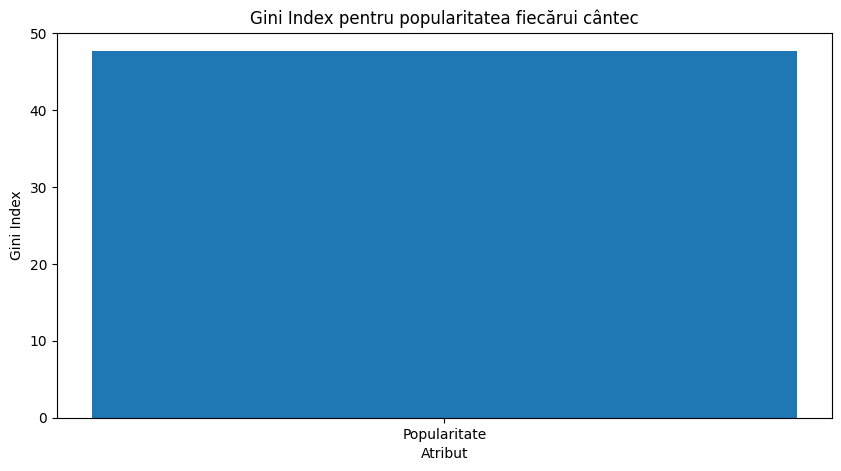

In [19]:

import matplotlib.pyplot as plt

# Calculăm Gini Index pentru întreaga coloană 'popularitate'
gini_popularity = gini_index(df['popularity'])

# Crearea unui grafic pentru a vizualiza Gini Index
plt.figure(figsize=(10, 5))
plt.bar('Popularitate', gini_popularity)
plt.xlabel('Atribut')
plt.ylabel('Gini Index')
plt.title('Gini Index pentru popularitatea fiecărui cântec')
plt.show()



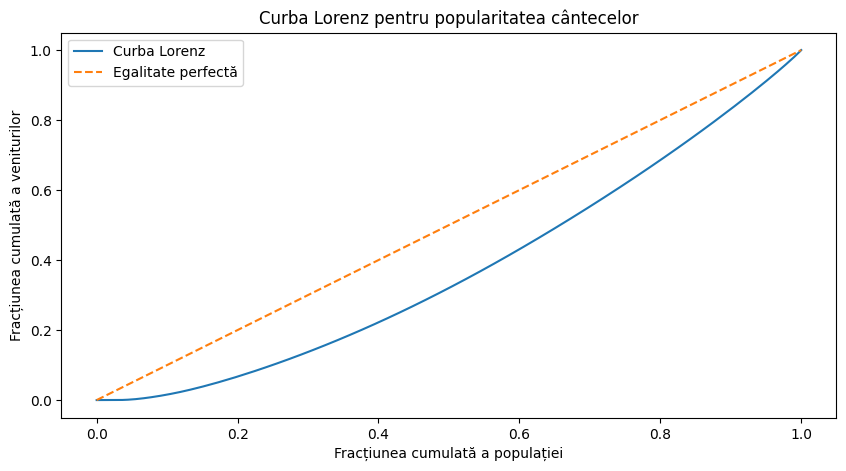

In [20]:

import matplotlib.pyplot as plt

# Calculăm Gini Index pentru întreaga coloană 'popularity'
gini_popularity = gini_index(df['popularity'])

# Sortăm DataFrame-ul după 'popularity'
df_sorted = df.sort_values('popularity')

# Calculăm fracțiunea cumulată a populației și a veniturilor
cumulative_population = np.cumsum(np.ones(df_sorted.shape[0]) / df_sorted.shape[0])
cumulative_income = np.cumsum(df_sorted['popularity']) / df_sorted['popularity'].sum()

# Crearea unui grafic pentru a vizualiza curba Lorenz
plt.figure(figsize=(10, 5))
plt.plot(cumulative_population, cumulative_income, label='Curba Lorenz')
plt.plot([0, 1], [0, 1], linestyle='--', label='Egalitate perfectă')
plt.xlabel('Fracțiunea cumulată a populației')
plt.ylabel('Fracțiunea cumulată a veniturilor')
plt.title('Curba Lorenz pentru popularitatea cântecelor')
plt.legend()
plt.show()


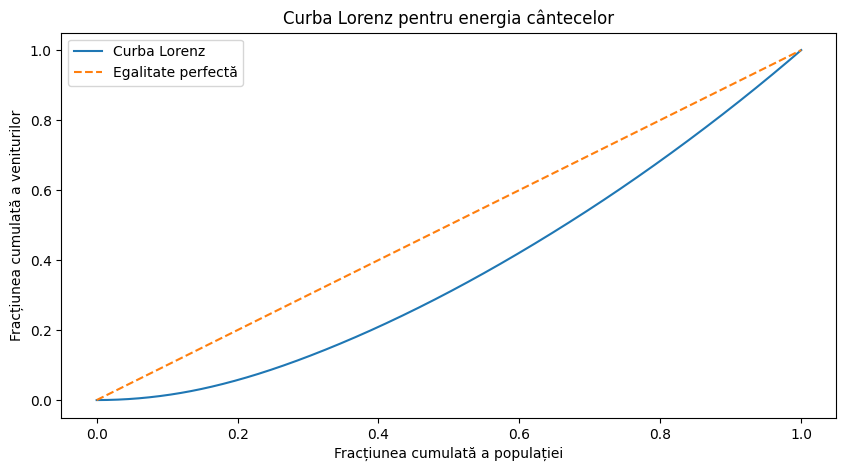

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Calculăm Indicele Gini pentru întreaga coloană 'popularitate'
gini_popularity = gini_index(df['energy'])

# Sortăm DataFrame-ul după 'popularitate'
df_sorted = df.sort_values('energy')

# Calculăm fracțiunea cumulată a populației și a veniturilor
cumulative_population = np.cumsum(np.ones(df_sorted.shape[0]) / df_sorted.shape[0])
cumulative_income = np.cumsum(df_sorted['energy']) / df_sorted['energy'].sum()

# Crearea unui grafic pentru a vizualiza curba Lorenz
plt.figure(figsize=(10, 5))
plt.plot(cumulative_population, cumulative_income, label='Curba Lorenz')
plt.plot([0, 1], [0, 1], linestyle='--', label='Egalitate perfectă')
plt.xlabel('Fracțiunea cumulată a populației')
plt.ylabel('Fracțiunea cumulată a veniturilor')
plt.title('Curba Lorenz pentru energia cântecelor')
plt.legend()
plt.show()


0.2506973537411181


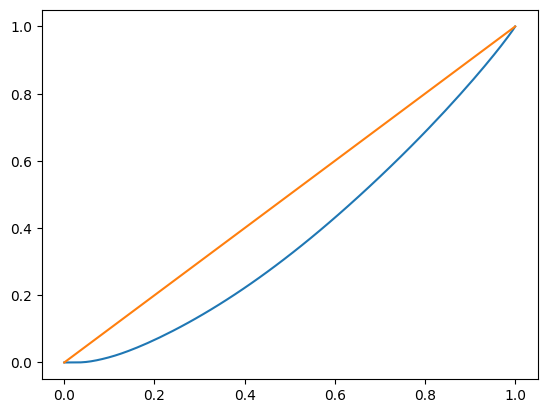

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# sortarea de la cea mai mică la cea mai mare valoare a popularității
popularity = df['popularity'].values
sorted_popularity = np.sort(popularity)

def gini(values):
    count = values.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * values).sum()
    total = values.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(values):
    # aceasta împarte suma prefixată la suma totală
    # acest lucru asigură că toate valorile sunt între 0 și 1.0
    scaled_prefix_sum = values.cumsum() / values.sum()
    # acesta adaugă valoarea 0 (deoarece 0% din toate persoanele au 0% din toată bogăția)
    return np.insert(scaled_prefix_sum, 0, 0)

# afișează indexul Gini
print(gini(sorted_popularity))

lorenz_curve = lorenz(sorted_popularity)

# avem nevoie ca valorile X să fie între 0.0 și 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
# trasează linia dreaptă a curbei egalității perfecte
plt.plot([0,1], [0,1])
plt.show()



## **Entropia într-o coloană din set-ul de date**


In [9]:
from scipy.stats import entropy

def calculate_entropy(data):
    # calculam frecventele valorilor
    value_counts = data.value_counts()
    # calculam probabilitatile valorilor
    probabilities = value_counts / len(data)
    # calculam entropia
    entropy_value = entropy(probabilities, base=2)
    return entropy_value



In [11]:
target_entropy = calculate_entropy(df['popularity'])
print("Entropia coloanei țintă: ", target_entropy)


Entropia coloanei țintă:  6.109083868804585


In [10]:
target_entropy = calculate_entropy(df['energy'])
print("Entropia coloanei țintă: ", target_entropy)


Entropia coloanei țintă:  10.100550355070647


In [12]:
target_entropy = calculate_entropy(df['danceability'])
print("Entropia coloanei țintă: ", target_entropy)


Entropia coloanei țintă:  9.551925727798254


In [13]:
target_entropy = calculate_entropy(df['loudness'])
print("Entropia coloanei țintă: ", target_entropy)


Entropia coloanei țintă:  14.044111520699715


## **Matrice de corelație**


In [7]:

# selectam doar coloanele numerice
df_numeric = df.select_dtypes(include=[np.number])

# calculam matricea de corelatie
correlation_matrix = df_numeric.corr()

# Afișăm matricea de corelație
print(correlation_matrix)



                  popularity  acousticness  danceability  duration_ms  \
popularity          1.000000     -0.381295      0.256564     0.002348   
acousticness       -0.381295      1.000000     -0.364546     0.011203   
danceability        0.256564     -0.364546      1.000000    -0.125781   
duration_ms         0.002348      0.011203     -0.125781     1.000000   
energy              0.248922     -0.725576      0.325807    -0.030550   
instrumentalness   -0.210983      0.316154     -0.364941     0.076021   
liveness           -0.167995      0.069004     -0.041684     0.023783   
loudness            0.363011     -0.690202      0.438668    -0.047618   
speechiness        -0.151076      0.150935      0.134560    -0.016171   
tempo               0.081039     -0.238247      0.021939    -0.028456   
valence             0.060076     -0.325798      0.547154    -0.141811   

                    energy  instrumentalness  liveness  loudness  speechiness  \
popularity        0.248922         -0.2109

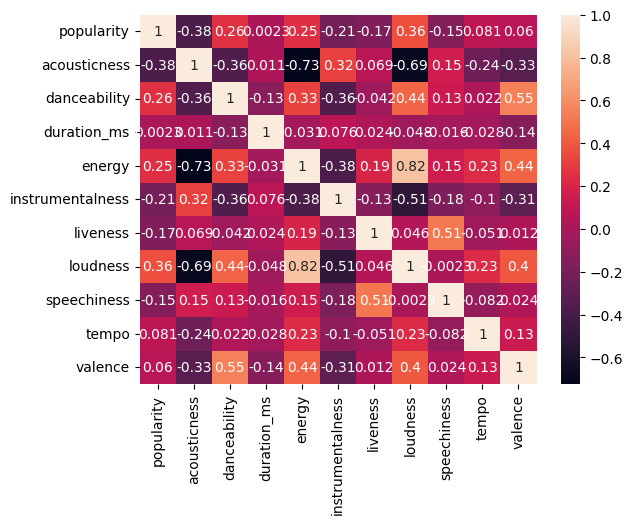

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# cream un heatmap pentru matricea de corelatie
sns.heatmap(correlation_matrix, annot=True)

# afisam heatmap-ul
plt.show()
